# Reinforcement learning

Reinforcement learning is een interessante methode om machine learning problemen mee op te lossen. Net als bij supervised learning wordt feedback en parameter tuning gebruikt om het algoritme te verbeteren. Maar het grote verschil is dat er bij reinforcement learning vrijwel geen datasets en labels aan te pas komen.

Reinforcement learning lijkt in veel opzichten op een toepassing in het brede veld van kunstmatige intelligentie (ook bekend als Artifical Intelligence (AI)). Met reinforcement learning proberen we meestal het algoritme een bepaald gedrag aan te leren (als situatie X zich voordoet, doe dan Y). Het kan echter niet volledig autonoom problemen oplossen, want er is nog altijd feedback van de ontwikkelaar nodig om het algoritme in de juiste richting te sturen. Aan het einde van de dag is reinforcement learning slechts één van de vele manieren waarmee problemen kunnen worden opgelost.

En over problemen gesproken...

## Blackjack

Stel je voor, je schuift aan tafel en doet gezellig mee aan een potje blackjack. Je kent de regels niet, en de Dealer zegt: "U heeft in totaal 20 punten. De Dealer heeft 10 punten. Wilt u uw punten vastzetten, of wilt u nog een kaart?" Je vraag om nog een kaart, en de Dealer zegt dat je hebt verloren en pakt al jouw inleg.

Dit is een pijnlijke les. Als deze exacte situatie zich nog een keer voordoet, dan zal je de volgende keer zeer waarschijnlijk voor de andere optie kiezen. Zodoende houd je bij wat de beste opties zijn in specifieke situaties. Deze methode noemen we reinforcement learning, waar we leren om de juiste acties te kiezen gebaseerd op de resultaten van eerder uitgevoerde acties in dezelfde situatie.

Voordat we de opdracht uitleggen zullen we eerst wat veelgebruikte termen binnen reinforcement learning definiëren.

## Terminologie

De eerste term is `agent`. De algoritmes die je in de eerste opdracht hebt toegepast reageerden passief op de data die ze kregen aangereikt: de data wordt geconsumeerd, berekeningen worden gedaan, en een classificatielabel wordt teruggegeven. Bij reinforcement learning hebben de algoritmes een actieve invloed op de *omgeving* waarin ze worden toegepast (dit noemen we de `environment`).

De `agent` is het gedeelte van het algoritme dat keuzes maakt welke *actie* (dit noemen we `action`) wordt uitgevoerd, en deze `action` beïnvloed vervolgens de `environment`. Het algoritme maakt deze keuze door de huidige *status van de omgeving* (dit noemen we `state`) te analyseren. Oftewel de `state` bevat alle nodige informatie voor het algoritme om tot een keuze voor de volgende `action` te kunnen komen.

Tot slot wordt er voor elke uitgevoerde actie een score (dit noemen we `reward`) toegekend. Als het resultaat van de actie positief heeft uitgepakt dan wordt een positieve `reward` toegekend, en anders een negatieve. Het is aan de ontwikkelaar om een keuze te maken hoe groot/klein, positief/negatief de `reward` hoort te zijn. Het doel is om de `reward` zo in te richten dat het algoritme leert wat de beste `action` is om uit te voeren in een specifieke `state`.

#### Voorbeeld
Laten we de termen toepassen in het bovengenoemde voorbeeld van blackjack. Het spel blackjack en alle daarbij behorende objecten (kaarten) en regels vormden in dit geval de `environment`. De `agent` was jijzelf, omdat jij de keuzes maakte die de `environment` beïnvloedde. De kaarten in jouw hand en de openliggende kaart van de dealer vormden de `state`. De `actions` die jij kon kiezen waren *"geef me een kaart"* of *"zet mijn punten vast"*. Uiteindelijk koos je voor een actie waarmee je jouw inzet verloor, dus de `reward` van deze `action` in deze `state` was gelijk aan het verlies van jouw inzet, oftewel een negatieve `reward`.

## De opdracht

Het doel van deze opdracht is om een algoritme te schrijven dat kan leren hoe het blackjack zo optimaal mogelijk kan spelen. Om dit te bereiken volg je de volgende stappen:

1. Verken de code, objecten en libraries waarmee je gaat werken
1. Bepaal de `state` voor dit spel
1. Bepaal de `rewards` die je wilt toekennen aan de verscheidene uitkomsten van een uitgevoerde `action`
1. Bepaal passende leerparameters voor het trainen van het algoritme
1. Test de kwaliteit van het algoritme

### Aangepaste regels
Om de opdracht niet te complex te maken, hebben we het spel blackjack vereenvoudigd met de volgende regels:

- Na elke ronde gaan de gespeelde kaarten weer terug in de stapel kaarten. Elke ronde wordt dus altijd met 52 kaarten gespeeld zodat de initiële `state` van elke ronde vergelijkbaar blijft.
- Het plaatsen van een inzet wordt buiten beschouwing gelaten.
- De enige acties die mogelijk zijn, zijn `HIT` en `STAND`. 

### Stap 1: Verken de code, objecten en libraries

In [1]:
import numpy as np
import pandas as pd
import random
from blackjack import Game, PlayerVictoryState, PlayerAction, DealerPlayStrategy, get_action_name

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

ACTIONS = [PlayerAction.HIT, PlayerAction.STAND]

Als je de code hierboven uitvoert, worden de nodige objecten en libraries ingeladen waarmee je de opdracht kunt uitvoeren. De acties zijn ook alvast gedefinieerd.

*Numpy* wordt gebruikt vanwege de krachtige `np.array([])` arrays die een hoop extra functionaliteit ondersteunt ten opzichte van de standaard arrays. *Pandas* wordt gebruikt om data in een DataFrame (een tabel / matrix) te kunnen tonen. *Matplotlib* en *Seaborn* bieden de mogelijkheid om grafieken te visualiseren zodat je een beter inzicht in de data kunt verkrijgen.   

Uit de `blackjack` module worden een aantal classes, enums en een functie geïmporteerd. Je kunt de `help()` methode gebruiken om te zien wat er in deze objecten aanwezig is.

In [2]:
help(Game)

Help on class Game in module blackjack:

class Game(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, dealer_strategy)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  act(self, action)
 |      The actor performs the chosen action.
 |      
 |      Parameters
 |      ----------
 |      action : PlayerAction
 |          The action to perform.
 |              
 |      Returns
 |      -------
 |      [PlayerState, RoundState]
 |          The game's state from the player's perspective and the round state.
 |  
 |  deal_card(self)
 |  
 |  deal_initial_hands(self)
 |  
 |  get_round_end_state(self)
 |  
 |  hit(self, player=None)
 |  
 |  next_round(self)
 |      Start a new round. Set the participating players and deal the initial cards.
 |      
 |      Returns
 |      -------
 |      PlayerState
 |          The game's state from the player's perspective.
 |  
 |  stand(self)
 |  
 |  update_player_state(self, drawn_card=None)
 |  
 |  -----

Laten we een nieuw blackjack spel aanmaken. Om een nieuw spel aan te maken moet je de Dealer strategie opgeven. De mogelijke opties zijn:

- `DealerPlayStrategy.REACH17`: Dit is een populaire strategie waarbij de Dealer probeert de speler te verslaan of gelijkspel te spelen door maximaal 17 punten te halen.
- `DealerPlayStrategy.GREEDY`: De Dealer probeert koste wat kost om de speler te verslaan of gelijkspel te spelen.

We zullen beginnen met de eerste strategie. 

In [3]:
game = Game(DealerPlayStrategy.REACH17)

### Stap 2: Bepaal de state voor dit spel 

Zoals je waarschijnlijk al hebt gezien, geeft de game logic bij het starten van een nieuwe ronde een `PlayerState` object terug. Dit object representeert de `state` van het spel vanuit het perspectief van de `actor`.

***OPDRACHT:*** *Bekijk deze state nader en creëer een nieuw state object die alle nodige informatie bevat die jij nodig acht om het algoritme een juiste `action` te kunnen laten kiezen. Tip: gebruik de `__dict__()` methode om de properties van een object te zien.*

In [4]:
player_state = game.next_round()

In [3]:
class State:
    
    def __init__(self, player_state):
        """
        Initialize the State class and select the useful data from the player_state parameter.
        
        Parameters
        ----------
        player_state : PlayerState
            The game's state from the actor's perspective
        """
        self.player_total = player_state.player_hand.calculate_total()
        self.dealer_total = player_state.dealer_revealed_card.value
        self.has_usable_ace = player_state.player_hand.has_usable_ace()
    
    def __str__(self):
        """
        Create a textual representation of the state.
        
        Returns
        -------
        string
            A textual representation of the state.
        """
        return "{}_{}_{}".format(self.player_total, self.has_usable_ace, self.dealer_total)

De onderstaande code levert de textuele representatie van jouw gedefinieerde `state` op. Als dit alle nodige informatie bevat, ga dan door naar stap 3.

In [6]:
print(State(player_state))

9_False_3


### Stap 3: Bepaal de rewards die je wilt toekennen aan de verscheidene uitkomsten van een uitgevoerde actie

Er zijn twee redenen waarom we juist de uitkomsten van de acties willen beoordelen in plaats van de actie zelf:

1. De waarde van de acties willen we juist meten. Als we de waarde van de actie bij elke `state` al weten, dan is er geen reden om reinforcement learning toe te passen.
1. De waarde van de acties kunnen wijzigen, zelfs als de `state` hetzelfde blijft. Bij blackjack staat namelijk nooit vast welke kaart je zal krijgen.

De onderstaande code geeft de uitkomsten van een actie terug.

In [7]:
player_state_, round_state = game.act(PlayerAction.STAND)
your_defined_player_state = State(player_state_)
print("Actor state:")
print()
print(your_defined_player_state)
print()
print("Round state:")
print()
print(round_state)

Actor state:

9_False_3

Round state:

Has round ended: True, Player victory state: PlayerVictoryState.LOST_BY_POINTS, Player total: 9, Dealer total: 13


De `round_state` bevat extra informatie die je kunt gebruiken om de `reward` van de uitkomst van een actie te kunnen berekenen.

***OPDRACHT:*** *Implementeer de onderstaande functie voor het berekenen van een `reward` behorend bij de uitkomst van een gekozen actie. Je mag ook hulpfuncties of variabelen buiten de functie aanmaken als je dat zou willen.*

In [8]:
ROUND_STATE_REWARDS = {
    PlayerVictoryState.WON: 100,
    PlayerVictoryState.LOST_BY_POINTS: -30,
    PlayerVictoryState.LOST_BY_BUST: -100,
    PlayerVictoryState.DRAW: 0
}

REWARD_HAND_INCREASE = 5
REWARD_HAND_DECREASE = -10
REWARD_HAND_SIMILAR = 0
    
def calculate_reward(previous_state, current_state, round_state):
    """
    Calculate a reward that fits the outcome of the chosen action.
    
    Parameters
    ----------
    ???

    Returns
    -------
    float
        The reward that fits the outcome of the chosen action.
    """
    if round_state.has_round_ended:
        return ROUND_STATE_REWARDS[round_state.player_victory_state]
    
    current_total = current_state.player_total
    previous_total = previous_state.player_total
    if current_total > previous_total:
        return REWARD_HAND_INCREASE
    elif current_total < previous_total:
        return REWARD_HAND_DECREASE
    else:
        return REWARD_HAND_SIMILAR

### Stap 4. Bepaal passende leerparameters voor het trainen van het algoritme

Om het algoritme blackjack optimaal te kunnen laten spelen, moet het eerst kennis opbouwen door een aantal potjes te spelen. De eerste paar potjes heeft het algoritme geen idee wat de waarde is van de mogelijke acties bij de desbetreffende `states`. Naarmate er genoeg rondes zijn gespeeld kan het algoritme een strategie gaan vormen waarmee het blackjack zo optimaal mogelijk kan gaan spelen.

#### Exploration en exploitation
Bij reinforcement learning zijn er twee concepten die je kunt inzetten om het algoritme een strategie aan te laten leren:

- `Exploration`. Het algoritme kiest een willekeurige actie om te meten in hoeverre dit positief of negatief uitpakt. Oftewel, het algoritme verkent mogelijke alternatieve strategieën.
- `Exploitation`. Het algoritme benut de kennis die het heeft opgebouwd en kiest de actie met de hoogste `reward`. Oftewel, het algoritme hanteert de huidige strategie.

Het is op het begin noodzakelijk om via `exploration` kennis op te bouwen. Naarmate het algoritme meer kennis opbouwt, wil je `exploitation` steeds meer laten toepassen. Deze populaire strategie staat bekend als het `epsilon-greedy` algoritme.

Bij `epsilon-greedy` geeft de waarde `epsilon` de mate waarin `exploration` wordt toegepast aan. Een waarde van `epsilon = 0.9` geeft aan dat het algoritme 90% van de tijd `exploration` toepast, en de andere 10% van de tijd `exploitation`. Naar verloop van tijd kun je `epsilon` verlagen (bijvoorbeeld met een constante zogeheten `decay rate`) zodat de mate van `exploration` afneemt en `exploitation` toeneemt om tot een optimale strategie te komen. Het is niet makkelijk om deze balans goed te krijgen en het vereist enige *trial and error*.

#### De leerparameters

Hieronder volgen de leerparameters die nog door jou moeten worden geconfigureerd.

In [9]:
number_of_episodes = 20000 # the number of rounds to play to train the algorithm 

epsilon = 0.9            # the exploration rate (0.0 - 1.0)
epsilon_decay = 0.999      # the exploration decay rate (0.0 - 1.0)
min_epsilon = 0.1        # the minimum exploration rate (0.0 - 1.0)

learn_rate = 1.0         # determines to what proportion to weigh in the prior (1 - learn_rate) and new knowledge (0.0 - 1.0)
learn_rate_decay = 0.999   # 0.0 - 1.0
min_learn_rate = 0.05     # 0.0 - 1.0

discount_factor = 1 # determines to what proportion to weigh in the future reward (0.0 - 1.0)

Zoals je ziet zijn er nog twee nieuwe parameters bijgekomen:

- `learn rate`. Ook wel bekend als alpha ($\alpha$). De `learn rate` geeft aan in hoeverre de huidige en nieuwe kennis over de waarde van een status-actie paar wordt meegenomen.
- `discount factor`. Ook wel bekend als gamma ($\gamma$). De `discount factor` geeft aan in hoeverre een mogelijke toekomstige `reward` wordt meegenomen.

Om beter te begrijpen hoe deze parameters worden toegepast, volgt hieronder de formule waarmee het algoritme zijn kennis opbouwt.

$$Q^{new}(s_t, a_t)\leftarrow (1 - \alpha) \cdot Q(s_t, a_t) + \alpha \cdot (r + \gamma \cdot max_aQ(s_{t+1}, a_t))$$

Het ziet er complex uit, maar het is gemakkelijk te begrijpen. Wat er gebeurt is dat een nieuwe status-actie waarde wordt berekend op basis van de som van twee delen.

Het eerste deel $(1 - \alpha) \cdot Q(s_t, a_t)$ vertegenwoordigt de oude status-actie waarde ($Q(s_t, a_t)$), oftewel de huidige kennis. $(1 - \alpha)$ geeft aan hoe zwaar deze huidige kennis wordt meegewogen.

Het tweede deel $\alpha \cdot (r + \gamma \cdot max_aQ(s_{t+1}, a_t))$ houdt de nieuw gevonden kennis in. Dit is gelijk aan de som van de directe beloning ($r$) die we hebben gekregen door de actie die is ondernomen + de maximale beloning die voor de volgende status kan worden verkregen ($max_aQ(s_{t+1}, a_t)$) en hoe zwaar dit wordt meegewogen door $\gamma$ (de `discount factor`). $\alpha$ geeft tot slot aan hoe zwaar deze nieuwe kennis wordt meegewogen.

Kort samengevat:

- Een hoge `learn rate` weegt de huidige kennis van het status-actie paar minder zwaar mee dan de nieuwe opgedane kennis, en vice versa. Op het begin moet de `learn rate` dus wel hoger dan 0 zijn om uberhaupt kennis op te doen.
- Een hoge `discount factor` weegt een mogelijke toekomstige `reward` die behoort bij een toekomstige status-actie paar zwaar mee, en vice versa. 
    
    Bijvoorbeeld: De speler heeft 11 punten in handen. Het algoritme kiest voor een `HIT` actie en de speler heeft vervolgens 21 punten. De beloning voor deze `HIT` actie kan dan in deze situatie sterk worden verhoogd als de `discount factor` hoog is geconfigureerd. Want de toekomstige reward binnen deze volgende state zal bij een `STAND` actie waarschijnlijk erg hoog liggen. Maar of dit een goed idee is ligt aan jou... 

***OPDRACHT:*** *Configureer de leerparameters en voer de onderstaande blokken codes uit om je algoritme te trainen.*

Dit onderstaande blok bevat functies die nodig zijn om de kennis voor het algoritme op te kunnen bouwen.

In [10]:
def choose_action(Q_table, state, epsilon):
    """
    Pick a random action (to explore options) or pick the action with the highest weight from the Q-Table (to exploit prior
    knowledge), depending on the epsilon value.
    
    Parameters
    ----------
    Q_table : dict
        The Q-Table containing the action-state weights.
    
    state : str
        A textual representation of the game state.
    
    epsilon : float
        A number between 0-1. It decides whether to use the Q-Table weights to determine the next action (exploitating), or to
        take a random action (exploration). 0 = always use the Q-Table weights, 1 = always take a random action.
        

    Returns
    -------
    PlayerAction
        The player action to perform.
    """
    if random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        actions = Q_table.get(state.__str__())
        if actions is None:
            return random.choice(ACTIONS)
        else:
            return PlayerAction(np.argmax(actions))
        
def get_q_table_actions(Q_table, state):
    """
    Get the action weights for a specific state from the Q-Table.
    
    Parameters
    ----------
    Q_table : dict
        The Q-Table containing the action-state weights.
        
    state : str
        A textual representation of the game state.

    Returns
    -------
    list<float>
        The action weights for a specific state.
    """
    actions = Q_table.get(state.__str__())
    if actions is None:
        actions = np.zeros(len(ACTIONS))
    return actions

def update_q_table(Q_table, state, action, learn_rate, reward, discount_factor, next_state):
    """
    Update the Q-Table weight of a specific action-state combination (:param action:, :param state:) by calculating the new
    weight with the Q-function.
    
    Parameters
    ----------
    Q_table : dict
        The Q-Table containing the action-state weights.
        
    state : str
        A textual representation of the game state.
    
    action : PlayerAction
        A numeric representation of the player action.
    
    learn_rate : float
        A number between 0-1. Also known as alpha. It determines to what proportion to weigh in the prior and new knowledge.
        0 = discard the newly gained knowledge, 1 = discard the prior knowledge
    
    reward : float
        A positive or negative reward that is associated with the chosen action (:param action:).
    
    discount_factor : float
        A number between 0-1. Also known as gamma. It determines to what proportion to weigh in the future reward.
        0 = never weigh in the future rewards, 1 = fully weigh in the future rewards.
    
    next_state : str
        A textual representation of the next (future) game state.

    Returns
    -------
    dict
        The Q-Table containing the updated action-state weights.
    """
    actions = get_q_table_actions(Q_table, state)
    next_actions = get_q_table_actions(Q_table, next_state)
    actions[action.value] = (1 - learn_rate) * actions[action.value] + learn_rate * (reward + discount_factor * np.max(next_actions))
    Q_table[state.__str__()] = actions
    return Q_table

En het volgende blok code traint het algoritme en bouwt de kennis op in een dictionary object genaamd Q (kort voor de algemene term Q-Table afkomstig van Q learning).

**Zorg ervoor dat je hieronder de TODO voor de `calculate_reward()` functie nog verwerkt zodat dit voldoet aan de signature van jouw geschreven functie.**

In [11]:
Q = dict() # the state-action knowledge space in the form of a dictionary

wins = 0
losses = 0
draws = 0

victory_rates = [] # the victory rates per round
ep_rewards = [] # the average reward per round

for episode in range(number_of_episodes):
    current_state_ = game.next_round()
    current_state = State(current_state_)
    total_reward = 0
    
    done = False
    rewards = []
    
    while not done:
        action = choose_action(Q, current_state, max(min_epsilon, epsilon * epsilon_decay ** episode))
        next_state_, round_state = game.act(action)
        next_state = State(next_state_)
        reward = calculate_reward(current_state, next_state, round_state) # TODO : add the required parameters from your calculate_reward function
        Q = update_q_table(Q, current_state, action, max(min_learn_rate, learn_rate * learn_rate_decay ** episode),\
                           reward, discount_factor, next_state)
        
        rewards.append(reward)
        
        done = round_state.has_round_ended
        current_state = next_state
        total_reward += reward
        
        if done:
            player_victory_state = round_state.player_victory_state
            if player_victory_state == PlayerVictoryState.WON:
                wins += 1
            elif player_victory_state == PlayerVictoryState.DRAW:
                draws += 1
            else:
                losses += 1
            
            victory_rates.append([
                wins / (episode + 1) * 100,
                losses / (episode + 1) * 100,
                draws / (episode + 1) * 100
            ])
    
    ep_rewards.append(sum(rewards) / len(rewards))
    print(f"Episode {episode + 1} reward: {total_reward}")

print(f"Wins: {wins / number_of_episodes * 100}% - Losses: {losses / number_of_episodes * 100}% - Draws: {draws / number_of_episodes * 100}%")

Episode 1 reward: -30
Episode 2 reward: -100
Episode 3 reward: -95
Episode 4 reward: -30
Episode 5 reward: -30
Episode 6 reward: -30
Episode 7 reward: 105
Episode 8 reward: -30
Episode 9 reward: -30
Episode 10 reward: 100
Episode 11 reward: -30
Episode 12 reward: -30
Episode 13 reward: -30
Episode 14 reward: -90
Episode 15 reward: -30
Episode 16 reward: -95
Episode 17 reward: -30
Episode 18 reward: 100
Episode 19 reward: -100
Episode 20 reward: 105
Episode 21 reward: -30
Episode 22 reward: 105
Episode 23 reward: -30
Episode 24 reward: -95
Episode 25 reward: -100
Episode 26 reward: -100
Episode 27 reward: -25
Episode 28 reward: -100
Episode 29 reward: 100
Episode 30 reward: -25
Episode 31 reward: -30
Episode 32 reward: -30
Episode 33 reward: -30
Episode 34 reward: 100
Episode 35 reward: -100
Episode 36 reward: 100
Episode 37 reward: -100
Episode 38 reward: -100
Episode 39 reward: -30
Episode 40 reward: -30
Episode 41 reward: 0
Episode 42 reward: -30
Episode 43 reward: -30
Episode 44 rew

Episode 358 reward: -25
Episode 359 reward: 100
Episode 360 reward: -30
Episode 361 reward: -100
Episode 362 reward: -30
Episode 363 reward: -30
Episode 364 reward: -30
Episode 365 reward: -30
Episode 366 reward: 5
Episode 367 reward: -30
Episode 368 reward: 5
Episode 369 reward: -30
Episode 370 reward: -25
Episode 371 reward: -100
Episode 372 reward: -30
Episode 373 reward: -30
Episode 374 reward: -30
Episode 375 reward: 0
Episode 376 reward: -30
Episode 377 reward: -30
Episode 378 reward: 100
Episode 379 reward: -30
Episode 380 reward: -30
Episode 381 reward: -30
Episode 382 reward: -30
Episode 383 reward: -100
Episode 384 reward: -100
Episode 385 reward: -30
Episode 386 reward: 100
Episode 387 reward: -30
Episode 388 reward: 100
Episode 389 reward: 100
Episode 390 reward: -25
Episode 391 reward: 0
Episode 392 reward: 105
Episode 393 reward: -95
Episode 394 reward: 0
Episode 395 reward: -30
Episode 396 reward: 100
Episode 397 reward: 105
Episode 398 reward: 100
Episode 399 reward: -1

Episode 846 reward: -30
Episode 847 reward: 100
Episode 848 reward: 100
Episode 849 reward: -30
Episode 850 reward: 100
Episode 851 reward: -100
Episode 852 reward: -30
Episode 853 reward: 100
Episode 854 reward: -30
Episode 855 reward: -30
Episode 856 reward: -25
Episode 857 reward: -30
Episode 858 reward: -100
Episode 859 reward: 0
Episode 860 reward: -95
Episode 861 reward: 100
Episode 862 reward: -30
Episode 863 reward: -30
Episode 864 reward: -30
Episode 865 reward: -30
Episode 866 reward: -25
Episode 867 reward: -30
Episode 868 reward: -100
Episode 869 reward: -95
Episode 870 reward: -100
Episode 871 reward: -30
Episode 872 reward: -40
Episode 873 reward: 5
Episode 874 reward: -5
Episode 875 reward: -30
Episode 876 reward: -30
Episode 877 reward: 100
Episode 878 reward: -30
Episode 879 reward: 5
Episode 880 reward: 100
Episode 881 reward: -30
Episode 882 reward: -100
Episode 883 reward: 100
Episode 884 reward: 100
Episode 885 reward: -30
Episode 886 reward: -30
Episode 887 reward

Episode 1285 reward: 100
Episode 1286 reward: 100
Episode 1287 reward: -30
Episode 1288 reward: -30
Episode 1289 reward: -30
Episode 1290 reward: 100
Episode 1291 reward: 100
Episode 1292 reward: 100
Episode 1293 reward: -95
Episode 1294 reward: 0
Episode 1295 reward: 100
Episode 1296 reward: -30
Episode 1297 reward: -100
Episode 1298 reward: -95
Episode 1299 reward: -25
Episode 1300 reward: -30
Episode 1301 reward: -25
Episode 1302 reward: 110
Episode 1303 reward: -30
Episode 1304 reward: -25
Episode 1305 reward: 0
Episode 1306 reward: -25
Episode 1307 reward: -30
Episode 1308 reward: 100
Episode 1309 reward: -25
Episode 1310 reward: 100
Episode 1311 reward: 105
Episode 1312 reward: 100
Episode 1313 reward: -30
Episode 1314 reward: 100
Episode 1315 reward: -30
Episode 1316 reward: -30
Episode 1317 reward: -20
Episode 1318 reward: -40
Episode 1319 reward: -30
Episode 1320 reward: 110
Episode 1321 reward: 100
Episode 1322 reward: 5
Episode 1323 reward: 105
Episode 1324 reward: -40
Episo

Episode 1749 reward: -30
Episode 1750 reward: 110
Episode 1751 reward: 100
Episode 1752 reward: -30
Episode 1753 reward: -30
Episode 1754 reward: 105
Episode 1755 reward: -30
Episode 1756 reward: 105
Episode 1757 reward: -25
Episode 1758 reward: -100
Episode 1759 reward: 105
Episode 1760 reward: 105
Episode 1761 reward: -25
Episode 1762 reward: -25
Episode 1763 reward: -95
Episode 1764 reward: -30
Episode 1765 reward: -95
Episode 1766 reward: -30
Episode 1767 reward: 105
Episode 1768 reward: 100
Episode 1769 reward: 100
Episode 1770 reward: 0
Episode 1771 reward: -30
Episode 1772 reward: -30
Episode 1773 reward: -95
Episode 1774 reward: 110
Episode 1775 reward: -20
Episode 1776 reward: 100
Episode 1777 reward: 100
Episode 1778 reward: 100
Episode 1779 reward: 100
Episode 1780 reward: 105
Episode 1781 reward: 10
Episode 1782 reward: 0
Episode 1783 reward: -30
Episode 1784 reward: -30
Episode 1785 reward: 5
Episode 1786 reward: -30
Episode 1787 reward: 90
Episode 1788 reward: -100
Episod

Episode 2143 reward: 105
Episode 2144 reward: 0
Episode 2145 reward: 100
Episode 2146 reward: 100
Episode 2147 reward: 100
Episode 2148 reward: -30
Episode 2149 reward: 105
Episode 2150 reward: 100
Episode 2151 reward: 100
Episode 2152 reward: -30
Episode 2153 reward: 100
Episode 2154 reward: -30
Episode 2155 reward: 100
Episode 2156 reward: -30
Episode 2157 reward: -30
Episode 2158 reward: 15
Episode 2159 reward: 105
Episode 2160 reward: 105
Episode 2161 reward: 100
Episode 2162 reward: -30
Episode 2163 reward: -100
Episode 2164 reward: 100
Episode 2165 reward: -30
Episode 2166 reward: -95
Episode 2167 reward: 105
Episode 2168 reward: -30
Episode 2169 reward: -20
Episode 2170 reward: -30
Episode 2171 reward: -100
Episode 2172 reward: -30
Episode 2173 reward: -30
Episode 2174 reward: -25
Episode 2175 reward: 105
Episode 2176 reward: -20
Episode 2177 reward: 0
Episode 2178 reward: 105
Episode 2179 reward: -20
Episode 2180 reward: -30
Episode 2181 reward: 100
Episode 2182 reward: -30
Epi

Episode 2540 reward: 105
Episode 2541 reward: -30
Episode 2542 reward: -100
Episode 2543 reward: 100
Episode 2544 reward: -100
Episode 2545 reward: -100
Episode 2546 reward: 105
Episode 2547 reward: 5
Episode 2548 reward: 10
Episode 2549 reward: -30
Episode 2550 reward: 105
Episode 2551 reward: -90
Episode 2552 reward: 100
Episode 2553 reward: -30
Episode 2554 reward: -25
Episode 2555 reward: 100
Episode 2556 reward: 100
Episode 2557 reward: 100
Episode 2558 reward: 100
Episode 2559 reward: 5
Episode 2560 reward: 0
Episode 2561 reward: -25
Episode 2562 reward: -25
Episode 2563 reward: 100
Episode 2564 reward: 110
Episode 2565 reward: -30
Episode 2566 reward: -30
Episode 2567 reward: -95
Episode 2568 reward: -30
Episode 2569 reward: -40
Episode 2570 reward: 100
Episode 2571 reward: -30
Episode 2572 reward: -100
Episode 2573 reward: 0
Episode 2574 reward: -30
Episode 2575 reward: 105
Episode 2576 reward: -100
Episode 2577 reward: 105
Episode 2578 reward: -30
Episode 2579 reward: -30
Epis

Episode 2946 reward: 105
Episode 2947 reward: 100
Episode 2948 reward: 5
Episode 2949 reward: -30
Episode 2950 reward: -95
Episode 2951 reward: 100
Episode 2952 reward: 100
Episode 2953 reward: 105
Episode 2954 reward: -30
Episode 2955 reward: -30
Episode 2956 reward: -25
Episode 2957 reward: -30
Episode 2958 reward: 100
Episode 2959 reward: 100
Episode 2960 reward: -20
Episode 2961 reward: -100
Episode 2962 reward: 105
Episode 2963 reward: -30
Episode 2964 reward: -25
Episode 2965 reward: 100
Episode 2966 reward: -25
Episode 2967 reward: 100
Episode 2968 reward: 0
Episode 2969 reward: -25
Episode 2970 reward: -100
Episode 2971 reward: -100
Episode 2972 reward: 100
Episode 2973 reward: 0
Episode 2974 reward: 100
Episode 2975 reward: 105
Episode 2976 reward: -100
Episode 2977 reward: -100
Episode 2978 reward: 105
Episode 2979 reward: 105
Episode 2980 reward: 100
Episode 2981 reward: -30
Episode 2982 reward: -30
Episode 2983 reward: 10
Episode 2984 reward: -30
Episode 2985 reward: 100
Ep

Episode 3351 reward: -100
Episode 3352 reward: -30
Episode 3353 reward: -95
Episode 3354 reward: -30
Episode 3355 reward: 0
Episode 3356 reward: -40
Episode 3357 reward: 105
Episode 3358 reward: 105
Episode 3359 reward: -100
Episode 3360 reward: -30
Episode 3361 reward: 105
Episode 3362 reward: -100
Episode 3363 reward: 0
Episode 3364 reward: -40
Episode 3365 reward: -30
Episode 3366 reward: 100
Episode 3367 reward: 0
Episode 3368 reward: -95
Episode 3369 reward: 100
Episode 3370 reward: -30
Episode 3371 reward: -30
Episode 3372 reward: 0
Episode 3373 reward: -35
Episode 3374 reward: 0
Episode 3375 reward: -30
Episode 3376 reward: -30
Episode 3377 reward: 100
Episode 3378 reward: 105
Episode 3379 reward: -30
Episode 3380 reward: -30
Episode 3381 reward: -30
Episode 3382 reward: 0
Episode 3383 reward: -30
Episode 3384 reward: -30
Episode 3385 reward: -30
Episode 3386 reward: -30
Episode 3387 reward: -30
Episode 3388 reward: 0
Episode 3389 reward: 100
Episode 3390 reward: -30
Episode 339

Episode 3725 reward: -95
Episode 3726 reward: -100
Episode 3727 reward: -25
Episode 3728 reward: 5
Episode 3729 reward: 100
Episode 3730 reward: 100
Episode 3731 reward: 105
Episode 3732 reward: 100
Episode 3733 reward: -30
Episode 3734 reward: 105
Episode 3735 reward: -35
Episode 3736 reward: -100
Episode 3737 reward: -100
Episode 3738 reward: -20
Episode 3739 reward: 105
Episode 3740 reward: 100
Episode 3741 reward: -25
Episode 3742 reward: 100
Episode 3743 reward: 0
Episode 3744 reward: -25
Episode 3745 reward: -30
Episode 3746 reward: 105
Episode 3747 reward: 105
Episode 3748 reward: -30
Episode 3749 reward: -25
Episode 3750 reward: -30
Episode 3751 reward: 105
Episode 3752 reward: -100
Episode 3753 reward: -30
Episode 3754 reward: 105
Episode 3755 reward: 105
Episode 3756 reward: -100
Episode 3757 reward: -100
Episode 3758 reward: 105
Episode 3759 reward: -30
Episode 3760 reward: 105
Episode 3761 reward: 100
Episode 3762 reward: 100
Episode 3763 reward: 110
Episode 3764 reward: -1

Episode 4088 reward: 5
Episode 4089 reward: 100
Episode 4090 reward: -30
Episode 4091 reward: -95
Episode 4092 reward: -25
Episode 4093 reward: 100
Episode 4094 reward: -25
Episode 4095 reward: 105
Episode 4096 reward: 100
Episode 4097 reward: -30
Episode 4098 reward: -30
Episode 4099 reward: 105
Episode 4100 reward: 105
Episode 4101 reward: -30
Episode 4102 reward: 100
Episode 4103 reward: -20
Episode 4104 reward: 5
Episode 4105 reward: -25
Episode 4106 reward: -30
Episode 4107 reward: 100
Episode 4108 reward: 10
Episode 4109 reward: -110
Episode 4110 reward: -30
Episode 4111 reward: 100
Episode 4112 reward: 100
Episode 4113 reward: -30
Episode 4114 reward: 105
Episode 4115 reward: -10
Episode 4116 reward: 100
Episode 4117 reward: 100
Episode 4118 reward: 105
Episode 4119 reward: -30
Episode 4120 reward: -30
Episode 4121 reward: -30
Episode 4122 reward: -20
Episode 4123 reward: -90
Episode 4124 reward: -100
Episode 4125 reward: -100
Episode 4126 reward: 100
Episode 4127 reward: -30
Ep

Episode 4532 reward: 100
Episode 4533 reward: -30
Episode 4534 reward: -25
Episode 4535 reward: -95
Episode 4536 reward: -30
Episode 4537 reward: -30
Episode 4538 reward: -30
Episode 4539 reward: -95
Episode 4540 reward: -25
Episode 4541 reward: -30
Episode 4542 reward: 105
Episode 4543 reward: 0
Episode 4544 reward: -95
Episode 4545 reward: 100
Episode 4546 reward: 100
Episode 4547 reward: 100
Episode 4548 reward: 110
Episode 4549 reward: -30
Episode 4550 reward: 100
Episode 4551 reward: -20
Episode 4552 reward: 100
Episode 4553 reward: 0
Episode 4554 reward: -100
Episode 4555 reward: 100
Episode 4556 reward: 105
Episode 4557 reward: 100
Episode 4558 reward: -100
Episode 4559 reward: -30
Episode 4560 reward: 105
Episode 4561 reward: -25
Episode 4562 reward: 100
Episode 4563 reward: -30
Episode 4564 reward: 100
Episode 4565 reward: -30
Episode 4566 reward: -10
Episode 4567 reward: 100
Episode 4568 reward: -30
Episode 4569 reward: -30
Episode 4570 reward: 100
Episode 4571 reward: -100
E

Episode 4883 reward: 105
Episode 4884 reward: 100
Episode 4885 reward: -100
Episode 4886 reward: 100
Episode 4887 reward: 0
Episode 4888 reward: -100
Episode 4889 reward: 105
Episode 4890 reward: 100
Episode 4891 reward: 105
Episode 4892 reward: 100
Episode 4893 reward: 105
Episode 4894 reward: -25
Episode 4895 reward: 105
Episode 4896 reward: -30
Episode 4897 reward: 105
Episode 4898 reward: -30
Episode 4899 reward: 100
Episode 4900 reward: -30
Episode 4901 reward: 95
Episode 4902 reward: -30
Episode 4903 reward: -30
Episode 4904 reward: -30
Episode 4905 reward: -100
Episode 4906 reward: -100
Episode 4907 reward: -20
Episode 4908 reward: -100
Episode 4909 reward: 105
Episode 4910 reward: 0
Episode 4911 reward: 5
Episode 4912 reward: 105
Episode 4913 reward: -100
Episode 4914 reward: -95
Episode 4915 reward: 0
Episode 4916 reward: -30
Episode 4917 reward: -25
Episode 4918 reward: 100
Episode 4919 reward: 100
Episode 4920 reward: 100
Episode 4921 reward: -30
Episode 4922 reward: 105
Epi

Episode 5289 reward: 105
Episode 5290 reward: -30
Episode 5291 reward: -25
Episode 5292 reward: 5
Episode 5293 reward: -25
Episode 5294 reward: 5
Episode 5295 reward: -30
Episode 5296 reward: 105
Episode 5297 reward: 100
Episode 5298 reward: 110
Episode 5299 reward: 105
Episode 5300 reward: -30
Episode 5301 reward: -25
Episode 5302 reward: 100
Episode 5303 reward: 105
Episode 5304 reward: -100
Episode 5305 reward: -30
Episode 5306 reward: 100
Episode 5307 reward: 105
Episode 5308 reward: -100
Episode 5309 reward: -100
Episode 5310 reward: -25
Episode 5311 reward: 105
Episode 5312 reward: -100
Episode 5313 reward: 100
Episode 5314 reward: -25
Episode 5315 reward: 0
Episode 5316 reward: -30
Episode 5317 reward: -30
Episode 5318 reward: 105
Episode 5319 reward: -20
Episode 5320 reward: 100
Episode 5321 reward: -100
Episode 5322 reward: 105
Episode 5323 reward: 105
Episode 5324 reward: 5
Episode 5325 reward: 105
Episode 5326 reward: 100
Episode 5327 reward: -25
Episode 5328 reward: -30
Epi

Episode 5741 reward: -15
Episode 5742 reward: 0
Episode 5743 reward: 100
Episode 5744 reward: 100
Episode 5745 reward: 105
Episode 5746 reward: 100
Episode 5747 reward: 5
Episode 5748 reward: 0
Episode 5749 reward: 110
Episode 5750 reward: -30
Episode 5751 reward: 0
Episode 5752 reward: 105
Episode 5753 reward: 100
Episode 5754 reward: 100
Episode 5755 reward: 100
Episode 5756 reward: -30
Episode 5757 reward: 100
Episode 5758 reward: 105
Episode 5759 reward: -110
Episode 5760 reward: -30
Episode 5761 reward: -30
Episode 5762 reward: 105
Episode 5763 reward: -30
Episode 5764 reward: -30
Episode 5765 reward: -25
Episode 5766 reward: 100
Episode 5767 reward: -25
Episode 5768 reward: -30
Episode 5769 reward: -25
Episode 5770 reward: -25
Episode 5771 reward: -110
Episode 5772 reward: 105
Episode 5773 reward: -25
Episode 5774 reward: 5
Episode 5775 reward: -25
Episode 5776 reward: -30
Episode 5777 reward: -30
Episode 5778 reward: 100
Episode 5779 reward: -25
Episode 5780 reward: -100
Episode

Episode 6147 reward: 100
Episode 6148 reward: -30
Episode 6149 reward: -100
Episode 6150 reward: 100
Episode 6151 reward: -25
Episode 6152 reward: -30
Episode 6153 reward: 5
Episode 6154 reward: 100
Episode 6155 reward: 100
Episode 6156 reward: 105
Episode 6157 reward: -30
Episode 6158 reward: -25
Episode 6159 reward: -30
Episode 6160 reward: 100
Episode 6161 reward: -25
Episode 6162 reward: -100
Episode 6163 reward: 100
Episode 6164 reward: -30
Episode 6165 reward: -95
Episode 6166 reward: -100
Episode 6167 reward: 100
Episode 6168 reward: -100
Episode 6169 reward: -30
Episode 6170 reward: -25
Episode 6171 reward: 105
Episode 6172 reward: 105
Episode 6173 reward: 5
Episode 6174 reward: -95
Episode 6175 reward: 100
Episode 6176 reward: -100
Episode 6177 reward: 0
Episode 6178 reward: 110
Episode 6179 reward: 100
Episode 6180 reward: 5
Episode 6181 reward: -30
Episode 6182 reward: 105
Episode 6183 reward: 100
Episode 6184 reward: -100
Episode 6185 reward: -100
Episode 6186 reward: -100


Episode 6643 reward: 110
Episode 6644 reward: 100
Episode 6645 reward: -25
Episode 6646 reward: 105
Episode 6647 reward: -30
Episode 6648 reward: 100
Episode 6649 reward: 110
Episode 6650 reward: 0
Episode 6651 reward: -30
Episode 6652 reward: -100
Episode 6653 reward: -30
Episode 6654 reward: -30
Episode 6655 reward: 100
Episode 6656 reward: -20
Episode 6657 reward: 100
Episode 6658 reward: 105
Episode 6659 reward: 105
Episode 6660 reward: 100
Episode 6661 reward: 0
Episode 6662 reward: 100
Episode 6663 reward: -30
Episode 6664 reward: -100
Episode 6665 reward: -30
Episode 6666 reward: 105
Episode 6667 reward: -30
Episode 6668 reward: -25
Episode 6669 reward: 0
Episode 6670 reward: -25
Episode 6671 reward: 0
Episode 6672 reward: -30
Episode 6673 reward: -100
Episode 6674 reward: -25
Episode 6675 reward: -30
Episode 6676 reward: -25
Episode 6677 reward: 100
Episode 6678 reward: 0
Episode 6679 reward: -25
Episode 6680 reward: -95
Episode 6681 reward: 105
Episode 6682 reward: -35
Episode

Episode 7052 reward: -30
Episode 7053 reward: 105
Episode 7054 reward: 100
Episode 7055 reward: -30
Episode 7056 reward: 100
Episode 7057 reward: -25
Episode 7058 reward: 105
Episode 7059 reward: 100
Episode 7060 reward: -30
Episode 7061 reward: -15
Episode 7062 reward: -30
Episode 7063 reward: 0
Episode 7064 reward: -100
Episode 7065 reward: 105
Episode 7066 reward: -25
Episode 7067 reward: 105
Episode 7068 reward: -100
Episode 7069 reward: -30
Episode 7070 reward: -30
Episode 7071 reward: -95
Episode 7072 reward: -25
Episode 7073 reward: 5
Episode 7074 reward: 100
Episode 7075 reward: -30
Episode 7076 reward: -100
Episode 7077 reward: 105
Episode 7078 reward: 105
Episode 7079 reward: 5
Episode 7080 reward: -30
Episode 7081 reward: -100
Episode 7082 reward: -95
Episode 7083 reward: 100
Episode 7084 reward: 105
Episode 7085 reward: -100
Episode 7086 reward: -30
Episode 7087 reward: 100
Episode 7088 reward: 100
Episode 7089 reward: -90
Episode 7090 reward: -30
Episode 7091 reward: 100
E

Episode 7505 reward: -30
Episode 7506 reward: -30
Episode 7507 reward: 100
Episode 7508 reward: -30
Episode 7509 reward: 0
Episode 7510 reward: 0
Episode 7511 reward: -25
Episode 7512 reward: -30
Episode 7513 reward: -25
Episode 7514 reward: -25
Episode 7515 reward: -30
Episode 7516 reward: 100
Episode 7517 reward: -100
Episode 7518 reward: 100
Episode 7519 reward: -25
Episode 7520 reward: -30
Episode 7521 reward: -85
Episode 7522 reward: 100
Episode 7523 reward: -40
Episode 7524 reward: -100
Episode 7525 reward: 0
Episode 7526 reward: -30
Episode 7527 reward: 100
Episode 7528 reward: -25
Episode 7529 reward: -25
Episode 7530 reward: 100
Episode 7531 reward: -30
Episode 7532 reward: 100
Episode 7533 reward: -100
Episode 7534 reward: -105
Episode 7535 reward: -95
Episode 7536 reward: 105
Episode 7537 reward: -30
Episode 7538 reward: 100
Episode 7539 reward: 0
Episode 7540 reward: -30
Episode 7541 reward: 0
Episode 7542 reward: 0
Episode 7543 reward: -30
Episode 7544 reward: -30
Episode 

Episode 7959 reward: -30
Episode 7960 reward: 100
Episode 7961 reward: -95
Episode 7962 reward: 100
Episode 7963 reward: -25
Episode 7964 reward: 110
Episode 7965 reward: 5
Episode 7966 reward: 100
Episode 7967 reward: -95
Episode 7968 reward: 100
Episode 7969 reward: -95
Episode 7970 reward: 0
Episode 7971 reward: -30
Episode 7972 reward: -25
Episode 7973 reward: -20
Episode 7974 reward: 5
Episode 7975 reward: 0
Episode 7976 reward: 100
Episode 7977 reward: -30
Episode 7978 reward: 100
Episode 7979 reward: 100
Episode 7980 reward: 105
Episode 7981 reward: 110
Episode 7982 reward: 5
Episode 7983 reward: 0
Episode 7984 reward: -25
Episode 7985 reward: 100
Episode 7986 reward: 100
Episode 7987 reward: -100
Episode 7988 reward: -30
Episode 7989 reward: 100
Episode 7990 reward: 100
Episode 7991 reward: -25
Episode 7992 reward: 100
Episode 7993 reward: 100
Episode 7994 reward: 110
Episode 7995 reward: 0
Episode 7996 reward: 0
Episode 7997 reward: -30
Episode 7998 reward: 0
Episode 7999 rewa

Episode 8371 reward: 105
Episode 8372 reward: -20
Episode 8373 reward: -30
Episode 8374 reward: 105
Episode 8375 reward: -30
Episode 8376 reward: 100
Episode 8377 reward: -100
Episode 8378 reward: 105
Episode 8379 reward: 100
Episode 8380 reward: -100
Episode 8381 reward: 100
Episode 8382 reward: 100
Episode 8383 reward: 100
Episode 8384 reward: 105
Episode 8385 reward: -85
Episode 8386 reward: 5
Episode 8387 reward: 100
Episode 8388 reward: 105
Episode 8389 reward: 100
Episode 8390 reward: 105
Episode 8391 reward: 105
Episode 8392 reward: -25
Episode 8393 reward: -30
Episode 8394 reward: -30
Episode 8395 reward: -30
Episode 8396 reward: 105
Episode 8397 reward: -25
Episode 8398 reward: -95
Episode 8399 reward: -100
Episode 8400 reward: -30
Episode 8401 reward: 0
Episode 8402 reward: -95
Episode 8403 reward: -30
Episode 8404 reward: 5
Episode 8405 reward: -100
Episode 8406 reward: 5
Episode 8407 reward: 110
Episode 8408 reward: 110
Episode 8409 reward: 100
Episode 8410 reward: -100
Epi

Episode 8877 reward: -100
Episode 8878 reward: -100
Episode 8879 reward: -30
Episode 8880 reward: -30
Episode 8881 reward: -95
Episode 8882 reward: -30
Episode 8883 reward: -100
Episode 8884 reward: -25
Episode 8885 reward: 100
Episode 8886 reward: -95
Episode 8887 reward: -30
Episode 8888 reward: -100
Episode 8889 reward: 0
Episode 8890 reward: -25
Episode 8891 reward: -100
Episode 8892 reward: -30
Episode 8893 reward: -100
Episode 8894 reward: -95
Episode 8895 reward: 0
Episode 8896 reward: 110
Episode 8897 reward: -30
Episode 8898 reward: -95
Episode 8899 reward: -30
Episode 8900 reward: -30
Episode 8901 reward: 95
Episode 8902 reward: 100
Episode 8903 reward: 105
Episode 8904 reward: 105
Episode 8905 reward: -95
Episode 8906 reward: 105
Episode 8907 reward: -30
Episode 8908 reward: -100
Episode 8909 reward: 100
Episode 8910 reward: -30
Episode 8911 reward: 100
Episode 8912 reward: 100
Episode 8913 reward: 100
Episode 8914 reward: -20
Episode 8915 reward: 105
Episode 8916 reward: 10

Episode 9307 reward: -25
Episode 9308 reward: -100
Episode 9309 reward: -30
Episode 9310 reward: 105
Episode 9311 reward: 100
Episode 9312 reward: 0
Episode 9313 reward: 110
Episode 9314 reward: -30
Episode 9315 reward: 5
Episode 9316 reward: -30
Episode 9317 reward: -25
Episode 9318 reward: 105
Episode 9319 reward: 100
Episode 9320 reward: 100
Episode 9321 reward: 100
Episode 9322 reward: 105
Episode 9323 reward: -100
Episode 9324 reward: -40
Episode 9325 reward: -30
Episode 9326 reward: -30
Episode 9327 reward: 10
Episode 9328 reward: -100
Episode 9329 reward: -25
Episode 9330 reward: 105
Episode 9331 reward: -25
Episode 9332 reward: -25
Episode 9333 reward: 5
Episode 9334 reward: 100
Episode 9335 reward: -25
Episode 9336 reward: 110
Episode 9337 reward: 105
Episode 9338 reward: -25
Episode 9339 reward: 100
Episode 9340 reward: 105
Episode 9341 reward: -90
Episode 9342 reward: -30
Episode 9343 reward: 105
Episode 9344 reward: -30
Episode 9345 reward: 105
Episode 9346 reward: -25
Epis

Episode 9750 reward: 105
Episode 9751 reward: 100
Episode 9752 reward: -95
Episode 9753 reward: -30
Episode 9754 reward: -25
Episode 9755 reward: -30
Episode 9756 reward: -100
Episode 9757 reward: 100
Episode 9758 reward: -25
Episode 9759 reward: 100
Episode 9760 reward: 0
Episode 9761 reward: 100
Episode 9762 reward: -100
Episode 9763 reward: 105
Episode 9764 reward: -30
Episode 9765 reward: 100
Episode 9766 reward: -100
Episode 9767 reward: -30
Episode 9768 reward: 110
Episode 9769 reward: -25
Episode 9770 reward: 105
Episode 9771 reward: 0
Episode 9772 reward: -25
Episode 9773 reward: 100
Episode 9774 reward: 110
Episode 9775 reward: 100
Episode 9776 reward: 100
Episode 9777 reward: -25
Episode 9778 reward: 10
Episode 9779 reward: 100
Episode 9780 reward: 100
Episode 9781 reward: -100
Episode 9782 reward: -30
Episode 9783 reward: 100
Episode 9784 reward: 105
Episode 9785 reward: -30
Episode 9786 reward: -100
Episode 9787 reward: -95
Episode 9788 reward: -30
Episode 9789 reward: -90


Episode 10161 reward: -95
Episode 10162 reward: -25
Episode 10163 reward: -30
Episode 10164 reward: -30
Episode 10165 reward: 105
Episode 10166 reward: -30
Episode 10167 reward: -100
Episode 10168 reward: 0
Episode 10169 reward: -30
Episode 10170 reward: 0
Episode 10171 reward: 0
Episode 10172 reward: 95
Episode 10173 reward: 105
Episode 10174 reward: -100
Episode 10175 reward: -30
Episode 10176 reward: -25
Episode 10177 reward: -100
Episode 10178 reward: 0
Episode 10179 reward: -100
Episode 10180 reward: 100
Episode 10181 reward: 105
Episode 10182 reward: -100
Episode 10183 reward: -25
Episode 10184 reward: 0
Episode 10185 reward: -100
Episode 10186 reward: -25
Episode 10187 reward: 0
Episode 10188 reward: 105
Episode 10189 reward: 105
Episode 10190 reward: 105
Episode 10191 reward: 100
Episode 10192 reward: -100
Episode 10193 reward: -30
Episode 10194 reward: 0
Episode 10195 reward: -95
Episode 10196 reward: 110
Episode 10197 reward: -25
Episode 10198 reward: -25
Episode 10199 reward

Episode 10635 reward: -110
Episode 10636 reward: 100
Episode 10637 reward: 5
Episode 10638 reward: -95
Episode 10639 reward: 0
Episode 10640 reward: 100
Episode 10641 reward: 100
Episode 10642 reward: -100
Episode 10643 reward: 105
Episode 10644 reward: -100
Episode 10645 reward: -95
Episode 10646 reward: -100
Episode 10647 reward: 105
Episode 10648 reward: -25
Episode 10649 reward: 10
Episode 10650 reward: 105
Episode 10651 reward: 95
Episode 10652 reward: 105
Episode 10653 reward: -95
Episode 10654 reward: -30
Episode 10655 reward: 100
Episode 10656 reward: 90
Episode 10657 reward: 100
Episode 10658 reward: -100
Episode 10659 reward: 100
Episode 10660 reward: 100
Episode 10661 reward: -95
Episode 10662 reward: -30
Episode 10663 reward: -100
Episode 10664 reward: 100
Episode 10665 reward: 100
Episode 10666 reward: 5
Episode 10667 reward: 105
Episode 10668 reward: 105
Episode 10669 reward: -100
Episode 10670 reward: -100
Episode 10671 reward: 100
Episode 10672 reward: 110
Episode 10673

Episode 11077 reward: -95
Episode 11078 reward: 110
Episode 11079 reward: -25
Episode 11080 reward: 100
Episode 11081 reward: -25
Episode 11082 reward: 100
Episode 11083 reward: 5
Episode 11084 reward: 100
Episode 11085 reward: -100
Episode 11086 reward: 105
Episode 11087 reward: 100
Episode 11088 reward: -30
Episode 11089 reward: 100
Episode 11090 reward: -25
Episode 11091 reward: -100
Episode 11092 reward: 100
Episode 11093 reward: 100
Episode 11094 reward: -30
Episode 11095 reward: 0
Episode 11096 reward: 100
Episode 11097 reward: 100
Episode 11098 reward: -30
Episode 11099 reward: -30
Episode 11100 reward: -95
Episode 11101 reward: 100
Episode 11102 reward: 0
Episode 11103 reward: 110
Episode 11104 reward: 100
Episode 11105 reward: -100
Episode 11106 reward: 100
Episode 11107 reward: -30
Episode 11108 reward: -25
Episode 11109 reward: -30
Episode 11110 reward: -100
Episode 11111 reward: -30
Episode 11112 reward: 105
Episode 11113 reward: 105
Episode 11114 reward: 100
Episode 11115 

Episode 11506 reward: 100
Episode 11507 reward: 105
Episode 11508 reward: -30
Episode 11509 reward: 5
Episode 11510 reward: 100
Episode 11511 reward: -30
Episode 11512 reward: -30
Episode 11513 reward: 0
Episode 11514 reward: -25
Episode 11515 reward: 0
Episode 11516 reward: 105
Episode 11517 reward: -30
Episode 11518 reward: 100
Episode 11519 reward: -20
Episode 11520 reward: -100
Episode 11521 reward: 100
Episode 11522 reward: 100
Episode 11523 reward: -30
Episode 11524 reward: -95
Episode 11525 reward: 0
Episode 11526 reward: -100
Episode 11527 reward: -30
Episode 11528 reward: 5
Episode 11529 reward: -25
Episode 11530 reward: 100
Episode 11531 reward: 105
Episode 11532 reward: 105
Episode 11533 reward: 5
Episode 11534 reward: -100
Episode 11535 reward: 105
Episode 11536 reward: 100
Episode 11537 reward: 100
Episode 11538 reward: 105
Episode 11539 reward: 5
Episode 11540 reward: 100
Episode 11541 reward: 100
Episode 11542 reward: -25
Episode 11543 reward: -30
Episode 11544 reward: 1

Episode 11835 reward: 100
Episode 11836 reward: -100
Episode 11837 reward: 100
Episode 11838 reward: 100
Episode 11839 reward: -35
Episode 11840 reward: -100
Episode 11841 reward: -25
Episode 11842 reward: 100
Episode 11843 reward: -25
Episode 11844 reward: -100
Episode 11845 reward: 5
Episode 11846 reward: -30
Episode 11847 reward: 0
Episode 11848 reward: 100
Episode 11849 reward: -100
Episode 11850 reward: -25
Episode 11851 reward: -30
Episode 11852 reward: 105
Episode 11853 reward: 0
Episode 11854 reward: -30
Episode 11855 reward: -20
Episode 11856 reward: 100
Episode 11857 reward: 105
Episode 11858 reward: 100
Episode 11859 reward: 5
Episode 11860 reward: 105
Episode 11861 reward: 115
Episode 11862 reward: -100
Episode 11863 reward: 100
Episode 11864 reward: 105
Episode 11865 reward: 100
Episode 11866 reward: -30
Episode 11867 reward: 105
Episode 11868 reward: -100
Episode 11869 reward: 105
Episode 11870 reward: -100
Episode 11871 reward: -30
Episode 11872 reward: 105
Episode 11873

Episode 12346 reward: 105
Episode 12347 reward: 100
Episode 12348 reward: -100
Episode 12349 reward: 110
Episode 12350 reward: -25
Episode 12351 reward: -30
Episode 12352 reward: 105
Episode 12353 reward: -30
Episode 12354 reward: 100
Episode 12355 reward: 105
Episode 12356 reward: 100
Episode 12357 reward: 100
Episode 12358 reward: 105
Episode 12359 reward: 0
Episode 12360 reward: -25
Episode 12361 reward: -95
Episode 12362 reward: -100
Episode 12363 reward: -25
Episode 12364 reward: 100
Episode 12365 reward: 105
Episode 12366 reward: 105
Episode 12367 reward: 110
Episode 12368 reward: -95
Episode 12369 reward: 105
Episode 12370 reward: -95
Episode 12371 reward: 100
Episode 12372 reward: -30
Episode 12373 reward: 105
Episode 12374 reward: -100
Episode 12375 reward: -100
Episode 12376 reward: -20
Episode 12377 reward: 100
Episode 12378 reward: -30
Episode 12379 reward: -25
Episode 12380 reward: -30
Episode 12381 reward: 100
Episode 12382 reward: 105
Episode 12383 reward: -95
Episode 12

Episode 12767 reward: -90
Episode 12768 reward: 100
Episode 12769 reward: 105
Episode 12770 reward: -30
Episode 12771 reward: 100
Episode 12772 reward: -100
Episode 12773 reward: -20
Episode 12774 reward: 105
Episode 12775 reward: 100
Episode 12776 reward: 105
Episode 12777 reward: -20
Episode 12778 reward: 110
Episode 12779 reward: -90
Episode 12780 reward: 0
Episode 12781 reward: -30
Episode 12782 reward: -95
Episode 12783 reward: -25
Episode 12784 reward: 100
Episode 12785 reward: 100
Episode 12786 reward: -100
Episode 12787 reward: 100
Episode 12788 reward: 105
Episode 12789 reward: -100
Episode 12790 reward: -95
Episode 12791 reward: 100
Episode 12792 reward: 100
Episode 12793 reward: -95
Episode 12794 reward: -100
Episode 12795 reward: 100
Episode 12796 reward: -15
Episode 12797 reward: 105
Episode 12798 reward: -30
Episode 12799 reward: 105
Episode 12800 reward: 110
Episode 12801 reward: 105
Episode 12802 reward: 105
Episode 12803 reward: 100
Episode 12804 reward: 105
Episode 12

Episode 13199 reward: -100
Episode 13200 reward: -100
Episode 13201 reward: 100
Episode 13202 reward: -30
Episode 13203 reward: -30
Episode 13204 reward: -25
Episode 13205 reward: 110
Episode 13206 reward: 95
Episode 13207 reward: -100
Episode 13208 reward: 100
Episode 13209 reward: -25
Episode 13210 reward: 0
Episode 13211 reward: -25
Episode 13212 reward: 105
Episode 13213 reward: 5
Episode 13214 reward: 105
Episode 13215 reward: 100
Episode 13216 reward: -30
Episode 13217 reward: 105
Episode 13218 reward: 100
Episode 13219 reward: -30
Episode 13220 reward: 100
Episode 13221 reward: -25
Episode 13222 reward: 0
Episode 13223 reward: 10
Episode 13224 reward: -30
Episode 13225 reward: -30
Episode 13226 reward: -25
Episode 13227 reward: 105
Episode 13228 reward: -20
Episode 13229 reward: -30
Episode 13230 reward: -10
Episode 13231 reward: 105
Episode 13232 reward: 100
Episode 13233 reward: 0
Episode 13234 reward: 5
Episode 13235 reward: -30
Episode 13236 reward: 100
Episode 13237 reward:

Episode 13669 reward: 5
Episode 13670 reward: -100
Episode 13671 reward: -95
Episode 13672 reward: 100
Episode 13673 reward: 100
Episode 13674 reward: 100
Episode 13675 reward: 100
Episode 13676 reward: 105
Episode 13677 reward: 5
Episode 13678 reward: 100
Episode 13679 reward: -100
Episode 13680 reward: -25
Episode 13681 reward: -30
Episode 13682 reward: -95
Episode 13683 reward: -100
Episode 13684 reward: 0
Episode 13685 reward: -30
Episode 13686 reward: 110
Episode 13687 reward: -100
Episode 13688 reward: -100
Episode 13689 reward: -100
Episode 13690 reward: 105
Episode 13691 reward: 105
Episode 13692 reward: -30
Episode 13693 reward: -110
Episode 13694 reward: 100
Episode 13695 reward: 100
Episode 13696 reward: -30
Episode 13697 reward: 110
Episode 13698 reward: -100
Episode 13699 reward: -30
Episode 13700 reward: 105
Episode 13701 reward: 0
Episode 13702 reward: -100
Episode 13703 reward: 0
Episode 13704 reward: -100
Episode 13705 reward: -30
Episode 13706 reward: 100
Episode 1370

Episode 14066 reward: -30
Episode 14067 reward: 100
Episode 14068 reward: -95
Episode 14069 reward: -25
Episode 14070 reward: -100
Episode 14071 reward: -95
Episode 14072 reward: -100
Episode 14073 reward: -30
Episode 14074 reward: -25
Episode 14075 reward: 5
Episode 14076 reward: -30
Episode 14077 reward: 105
Episode 14078 reward: -30
Episode 14079 reward: 100
Episode 14080 reward: -100
Episode 14081 reward: -30
Episode 14082 reward: -110
Episode 14083 reward: -95
Episode 14084 reward: -30
Episode 14085 reward: -25
Episode 14086 reward: -90
Episode 14087 reward: 0
Episode 14088 reward: 105
Episode 14089 reward: 5
Episode 14090 reward: 0
Episode 14091 reward: -35
Episode 14092 reward: -100
Episode 14093 reward: -25
Episode 14094 reward: -100
Episode 14095 reward: -95
Episode 14096 reward: -100
Episode 14097 reward: 100
Episode 14098 reward: 5
Episode 14099 reward: -100
Episode 14100 reward: 10
Episode 14101 reward: -25
Episode 14102 reward: -30
Episode 14103 reward: 115
Episode 14104 r

Episode 14519 reward: 100
Episode 14520 reward: -30
Episode 14521 reward: -100
Episode 14522 reward: -30
Episode 14523 reward: -15
Episode 14524 reward: -100
Episode 14525 reward: 0
Episode 14526 reward: -30
Episode 14527 reward: -25
Episode 14528 reward: 105
Episode 14529 reward: 100
Episode 14530 reward: 105
Episode 14531 reward: -30
Episode 14532 reward: -25
Episode 14533 reward: 105
Episode 14534 reward: -95
Episode 14535 reward: 100
Episode 14536 reward: 5
Episode 14537 reward: 105
Episode 14538 reward: 105
Episode 14539 reward: 100
Episode 14540 reward: 100
Episode 14541 reward: 100
Episode 14542 reward: 100
Episode 14543 reward: 100
Episode 14544 reward: -95
Episode 14545 reward: -25
Episode 14546 reward: 105
Episode 14547 reward: 105
Episode 14548 reward: -25
Episode 14549 reward: 105
Episode 14550 reward: -95
Episode 14551 reward: 100
Episode 14552 reward: -100
Episode 14553 reward: 110
Episode 14554 reward: -100
Episode 14555 reward: -25
Episode 14556 reward: -35
Episode 1455

Episode 14864 reward: 100
Episode 14865 reward: 100
Episode 14866 reward: 0
Episode 14867 reward: 5
Episode 14868 reward: -95
Episode 14869 reward: 0
Episode 14870 reward: 100
Episode 14871 reward: -20
Episode 14872 reward: -30
Episode 14873 reward: 110
Episode 14874 reward: -25
Episode 14875 reward: 5
Episode 14876 reward: 100
Episode 14877 reward: 10
Episode 14878 reward: 105
Episode 14879 reward: -100
Episode 14880 reward: 100
Episode 14881 reward: -100
Episode 14882 reward: 110
Episode 14883 reward: -30
Episode 14884 reward: -25
Episode 14885 reward: -35
Episode 14886 reward: 105
Episode 14887 reward: 105
Episode 14888 reward: 100
Episode 14889 reward: -100
Episode 14890 reward: -25
Episode 14891 reward: -30
Episode 14892 reward: -100
Episode 14893 reward: -25
Episode 14894 reward: -95
Episode 14895 reward: 100
Episode 14896 reward: -20
Episode 14897 reward: 105
Episode 14898 reward: -30
Episode 14899 reward: -95
Episode 14900 reward: 10
Episode 14901 reward: -100
Episode 14902 rew

Episode 15222 reward: 110
Episode 15223 reward: 110
Episode 15224 reward: 100
Episode 15225 reward: -100
Episode 15226 reward: -20
Episode 15227 reward: 100
Episode 15228 reward: -100
Episode 15229 reward: -30
Episode 15230 reward: -100
Episode 15231 reward: -20
Episode 15232 reward: -110
Episode 15233 reward: -100
Episode 15234 reward: 5
Episode 15235 reward: -30
Episode 15236 reward: 100
Episode 15237 reward: -20
Episode 15238 reward: -100
Episode 15239 reward: -100
Episode 15240 reward: -25
Episode 15241 reward: -30
Episode 15242 reward: 100
Episode 15243 reward: -30
Episode 15244 reward: 105
Episode 15245 reward: 105
Episode 15246 reward: 105
Episode 15247 reward: 100
Episode 15248 reward: 105
Episode 15249 reward: 100
Episode 15250 reward: 105
Episode 15251 reward: 100
Episode 15252 reward: 100
Episode 15253 reward: 100
Episode 15254 reward: 105
Episode 15255 reward: -30
Episode 15256 reward: 105
Episode 15257 reward: 100
Episode 15258 reward: 100
Episode 15259 reward: 105
Episode

Episode 15675 reward: 100
Episode 15676 reward: 100
Episode 15677 reward: -100
Episode 15678 reward: 0
Episode 15679 reward: -95
Episode 15680 reward: -30
Episode 15681 reward: 100
Episode 15682 reward: -25
Episode 15683 reward: 5
Episode 15684 reward: -25
Episode 15685 reward: 0
Episode 15686 reward: 5
Episode 15687 reward: -95
Episode 15688 reward: -30
Episode 15689 reward: -100
Episode 15690 reward: -25
Episode 15691 reward: -25
Episode 15692 reward: -100
Episode 15693 reward: 100
Episode 15694 reward: -90
Episode 15695 reward: -30
Episode 15696 reward: -100
Episode 15697 reward: 105
Episode 15698 reward: 105
Episode 15699 reward: 100
Episode 15700 reward: -100
Episode 15701 reward: 0
Episode 15702 reward: -30
Episode 15703 reward: -30
Episode 15704 reward: -100
Episode 15705 reward: -95
Episode 15706 reward: -30
Episode 15707 reward: 100
Episode 15708 reward: -30
Episode 15709 reward: 0
Episode 15710 reward: 10
Episode 15711 reward: 100
Episode 15712 reward: -30
Episode 15713 rewar

Episode 16163 reward: -95
Episode 16164 reward: -30
Episode 16165 reward: -30
Episode 16166 reward: -100
Episode 16167 reward: -100
Episode 16168 reward: 105
Episode 16169 reward: -25
Episode 16170 reward: -90
Episode 16171 reward: 100
Episode 16172 reward: 105
Episode 16173 reward: -100
Episode 16174 reward: -25
Episode 16175 reward: -30
Episode 16176 reward: -30
Episode 16177 reward: 5
Episode 16178 reward: -30
Episode 16179 reward: -30
Episode 16180 reward: -25
Episode 16181 reward: 100
Episode 16182 reward: -30
Episode 16183 reward: 100
Episode 16184 reward: 105
Episode 16185 reward: -30
Episode 16186 reward: -110
Episode 16187 reward: 100
Episode 16188 reward: 100
Episode 16189 reward: -100
Episode 16190 reward: 100
Episode 16191 reward: -105
Episode 16192 reward: -110
Episode 16193 reward: -25
Episode 16194 reward: -30
Episode 16195 reward: 100
Episode 16196 reward: 0
Episode 16197 reward: 100
Episode 16198 reward: -95
Episode 16199 reward: -30
Episode 16200 reward: -30
Episode 1

Episode 16630 reward: 105
Episode 16631 reward: 100
Episode 16632 reward: 15
Episode 16633 reward: -95
Episode 16634 reward: 5
Episode 16635 reward: 105
Episode 16636 reward: 0
Episode 16637 reward: -25
Episode 16638 reward: 100
Episode 16639 reward: 100
Episode 16640 reward: -30
Episode 16641 reward: 105
Episode 16642 reward: -30
Episode 16643 reward: 100
Episode 16644 reward: 100
Episode 16645 reward: 110
Episode 16646 reward: 0
Episode 16647 reward: -95
Episode 16648 reward: -30
Episode 16649 reward: 100
Episode 16650 reward: -30
Episode 16651 reward: 0
Episode 16652 reward: -100
Episode 16653 reward: -100
Episode 16654 reward: 100
Episode 16655 reward: 100
Episode 16656 reward: -100
Episode 16657 reward: 100
Episode 16658 reward: 100
Episode 16659 reward: 105
Episode 16660 reward: -30
Episode 16661 reward: 105
Episode 16662 reward: -100
Episode 16663 reward: 110
Episode 16664 reward: 0
Episode 16665 reward: -15
Episode 16666 reward: 100
Episode 16667 reward: 105
Episode 16668 rewar

Episode 16947 reward: -100
Episode 16948 reward: -30
Episode 16949 reward: 0
Episode 16950 reward: -100
Episode 16951 reward: 5
Episode 16952 reward: 100
Episode 16953 reward: -5
Episode 16954 reward: 0
Episode 16955 reward: 105
Episode 16956 reward: -95
Episode 16957 reward: 100
Episode 16958 reward: 105
Episode 16959 reward: -30
Episode 16960 reward: 0
Episode 16961 reward: -25
Episode 16962 reward: 110
Episode 16963 reward: -95
Episode 16964 reward: 100
Episode 16965 reward: -100
Episode 16966 reward: -20
Episode 16967 reward: -25
Episode 16968 reward: -95
Episode 16969 reward: 105
Episode 16970 reward: 105
Episode 16971 reward: -95
Episode 16972 reward: 105
Episode 16973 reward: 105
Episode 16974 reward: 100
Episode 16975 reward: -95
Episode 16976 reward: -100
Episode 16977 reward: 100
Episode 16978 reward: 100
Episode 16979 reward: 100
Episode 16980 reward: 100
Episode 16981 reward: -25
Episode 16982 reward: -90
Episode 16983 reward: -30
Episode 16984 reward: 105
Episode 16985 rew

Episode 17402 reward: 5
Episode 17403 reward: -25
Episode 17404 reward: -100
Episode 17405 reward: -30
Episode 17406 reward: -100
Episode 17407 reward: -10
Episode 17408 reward: 100
Episode 17409 reward: 110
Episode 17410 reward: 105
Episode 17411 reward: -95
Episode 17412 reward: 5
Episode 17413 reward: -100
Episode 17414 reward: -30
Episode 17415 reward: -100
Episode 17416 reward: 105
Episode 17417 reward: -25
Episode 17418 reward: 0
Episode 17419 reward: -90
Episode 17420 reward: -30
Episode 17421 reward: -100
Episode 17422 reward: -30
Episode 17423 reward: 105
Episode 17424 reward: -30
Episode 17425 reward: 5
Episode 17426 reward: 105
Episode 17427 reward: 100
Episode 17428 reward: -25
Episode 17429 reward: -100
Episode 17430 reward: 105
Episode 17431 reward: 105
Episode 17432 reward: 115
Episode 17433 reward: 100
Episode 17434 reward: 110
Episode 17435 reward: -90
Episode 17436 reward: -30
Episode 17437 reward: -30
Episode 17438 reward: -25
Episode 17439 reward: 100
Episode 17440 

Episode 17740 reward: -95
Episode 17741 reward: 100
Episode 17742 reward: -100
Episode 17743 reward: 105
Episode 17744 reward: 5
Episode 17745 reward: -25
Episode 17746 reward: 100
Episode 17747 reward: 0
Episode 17748 reward: -25
Episode 17749 reward: 105
Episode 17750 reward: -100
Episode 17751 reward: 100
Episode 17752 reward: 0
Episode 17753 reward: -30
Episode 17754 reward: -100
Episode 17755 reward: 105
Episode 17756 reward: -25
Episode 17757 reward: 110
Episode 17758 reward: 105
Episode 17759 reward: 110
Episode 17760 reward: -90
Episode 17761 reward: 105
Episode 17762 reward: 110
Episode 17763 reward: -95
Episode 17764 reward: -30
Episode 17765 reward: -30
Episode 17766 reward: 100
Episode 17767 reward: -30
Episode 17768 reward: -100
Episode 17769 reward: 100
Episode 17770 reward: -95
Episode 17771 reward: 10
Episode 17772 reward: 105
Episode 17773 reward: -30
Episode 17774 reward: -25
Episode 17775 reward: -25
Episode 17776 reward: -90
Episode 17777 reward: -30
Episode 17778 r

Episode 18129 reward: 100
Episode 18130 reward: 110
Episode 18131 reward: -25
Episode 18132 reward: 105
Episode 18133 reward: 105
Episode 18134 reward: -25
Episode 18135 reward: -105
Episode 18136 reward: -100
Episode 18137 reward: -100
Episode 18138 reward: -25
Episode 18139 reward: -95
Episode 18140 reward: 105
Episode 18141 reward: -95
Episode 18142 reward: -100
Episode 18143 reward: -100
Episode 18144 reward: -100
Episode 18145 reward: 100
Episode 18146 reward: -100
Episode 18147 reward: 110
Episode 18148 reward: 0
Episode 18149 reward: 5
Episode 18150 reward: 105
Episode 18151 reward: 0
Episode 18152 reward: 105
Episode 18153 reward: -100
Episode 18154 reward: 110
Episode 18155 reward: -100
Episode 18156 reward: -30
Episode 18157 reward: -30
Episode 18158 reward: 100
Episode 18159 reward: -15
Episode 18160 reward: -30
Episode 18161 reward: -30
Episode 18162 reward: -100
Episode 18163 reward: -30
Episode 18164 reward: -25
Episode 18165 reward: 100
Episode 18166 reward: -25
Episode 

Episode 18537 reward: -25
Episode 18538 reward: -30
Episode 18539 reward: 100
Episode 18540 reward: -30
Episode 18541 reward: 100
Episode 18542 reward: -25
Episode 18543 reward: 105
Episode 18544 reward: 105
Episode 18545 reward: -30
Episode 18546 reward: 105
Episode 18547 reward: 100
Episode 18548 reward: 5
Episode 18549 reward: -30
Episode 18550 reward: -25
Episode 18551 reward: 100
Episode 18552 reward: -90
Episode 18553 reward: 100
Episode 18554 reward: -95
Episode 18555 reward: 105
Episode 18556 reward: 100
Episode 18557 reward: 100
Episode 18558 reward: -30
Episode 18559 reward: 5
Episode 18560 reward: 100
Episode 18561 reward: -100
Episode 18562 reward: 100
Episode 18563 reward: -30
Episode 18564 reward: -90
Episode 18565 reward: 100
Episode 18566 reward: 105
Episode 18567 reward: -100
Episode 18568 reward: -30
Episode 18569 reward: -100
Episode 18570 reward: 100
Episode 18571 reward: -30
Episode 18572 reward: 10
Episode 18573 reward: -30
Episode 18574 reward: -30
Episode 18575 

Episode 18858 reward: 100
Episode 18859 reward: 95
Episode 18860 reward: 105
Episode 18861 reward: 100
Episode 18862 reward: -20
Episode 18863 reward: -25
Episode 18864 reward: 0
Episode 18865 reward: -110
Episode 18866 reward: -30
Episode 18867 reward: 100
Episode 18868 reward: 0
Episode 18869 reward: -100
Episode 18870 reward: -30
Episode 18871 reward: 100
Episode 18872 reward: 0
Episode 18873 reward: 5
Episode 18874 reward: 100
Episode 18875 reward: 0
Episode 18876 reward: -100
Episode 18877 reward: 0
Episode 18878 reward: 105
Episode 18879 reward: 100
Episode 18880 reward: -30
Episode 18881 reward: -30
Episode 18882 reward: -95
Episode 18883 reward: 5
Episode 18884 reward: 105
Episode 18885 reward: 0
Episode 18886 reward: -30
Episode 18887 reward: 0
Episode 18888 reward: -100
Episode 18889 reward: 10
Episode 18890 reward: 100
Episode 18891 reward: -100
Episode 18892 reward: -100
Episode 18893 reward: -30
Episode 18894 reward: 100
Episode 18895 reward: -100
Episode 18896 reward: 110

Episode 19246 reward: 110
Episode 19247 reward: 105
Episode 19248 reward: 100
Episode 19249 reward: 5
Episode 19250 reward: -30
Episode 19251 reward: 105
Episode 19252 reward: -30
Episode 19253 reward: -30
Episode 19254 reward: 105
Episode 19255 reward: 105
Episode 19256 reward: 105
Episode 19257 reward: 100
Episode 19258 reward: -25
Episode 19259 reward: -100
Episode 19260 reward: -30
Episode 19261 reward: 105
Episode 19262 reward: 100
Episode 19263 reward: -100
Episode 19264 reward: 5
Episode 19265 reward: 105
Episode 19266 reward: 100
Episode 19267 reward: 105
Episode 19268 reward: 100
Episode 19269 reward: 100
Episode 19270 reward: 100
Episode 19271 reward: -30
Episode 19272 reward: -100
Episode 19273 reward: -95
Episode 19274 reward: -30
Episode 19275 reward: -25
Episode 19276 reward: 5
Episode 19277 reward: -20
Episode 19278 reward: -30
Episode 19279 reward: 105
Episode 19280 reward: 110
Episode 19281 reward: 100
Episode 19282 reward: -100
Episode 19283 reward: 100
Episode 19284 

Episode 19674 reward: 110
Episode 19675 reward: 5
Episode 19676 reward: 100
Episode 19677 reward: -30
Episode 19678 reward: -20
Episode 19679 reward: 100
Episode 19680 reward: -30
Episode 19681 reward: -90
Episode 19682 reward: 105
Episode 19683 reward: -95
Episode 19684 reward: 5
Episode 19685 reward: -100
Episode 19686 reward: 105
Episode 19687 reward: -30
Episode 19688 reward: 110
Episode 19689 reward: 100
Episode 19690 reward: 100
Episode 19691 reward: 105
Episode 19692 reward: -30
Episode 19693 reward: -100
Episode 19694 reward: 10
Episode 19695 reward: -25
Episode 19696 reward: 105
Episode 19697 reward: -100
Episode 19698 reward: 105
Episode 19699 reward: -85
Episode 19700 reward: -5
Episode 19701 reward: 100
Episode 19702 reward: -100
Episode 19703 reward: -30
Episode 19704 reward: -100
Episode 19705 reward: -90
Episode 19706 reward: 0
Episode 19707 reward: 100
Episode 19708 reward: 100
Episode 19709 reward: -100
Episode 19710 reward: -100
Episode 19711 reward: -95
Episode 19712

## Stap 5: Test de kwaliteit van het algoritme

Nu dat je een algoritme hebt getraind is het tijd om de kwaliteit van het algoritme te testen. Om wat meer inzage in het getrainde algoritme te krijgen, kun je de volgende functies gebruiken om het een en ander te visualiseren.

In [2]:
from blackjack_test import print_q_table, plot_victory_rates, plot_rewards, test_algorithm

In [13]:
print_q_table(Q)

,HIT,STAND
10_False_10,1371.396136,527.872444
10_False_11,67.662410,-14.151685
10_False_2,556.500265,21.514755
10_False_3,430.210127,6.594391
10_False_4,517.534712,12.716723
10_False_5,451.540508,7.949245
10_False_6,557.186124,5.141157
10_False_7,550.976899,92.097624
10_False_8,417.291235,50.559308
10_False_9,286.087091,40.182522


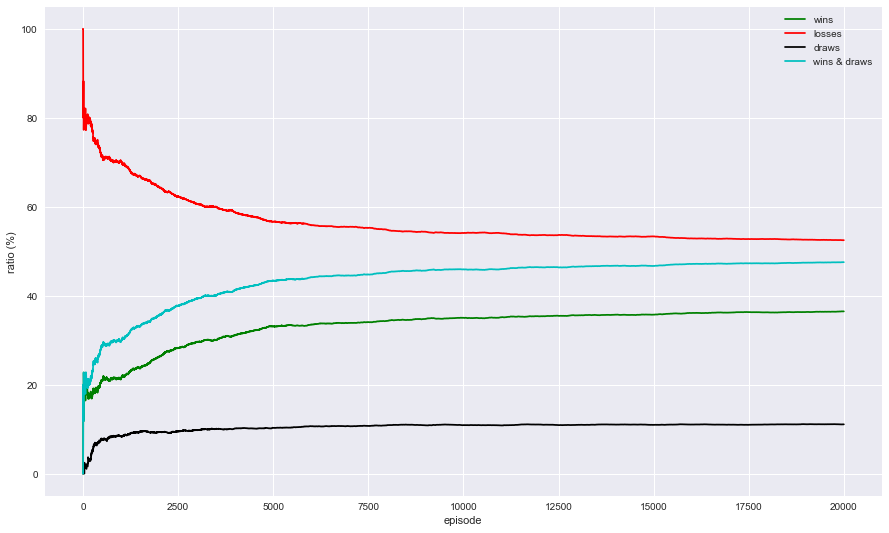

In [14]:
plot_victory_rates(victory_rates, number_of_episodes)

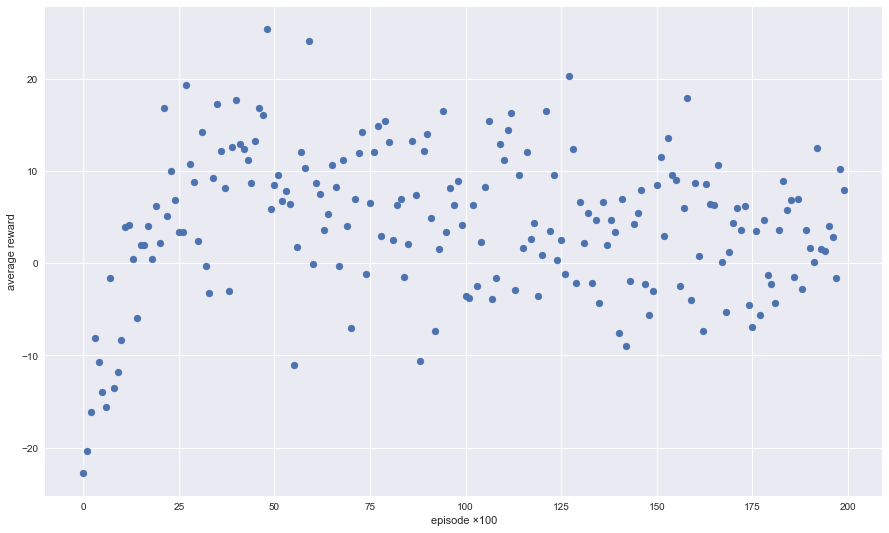

In [15]:
plot_rewards(ep_rewards, factor=100)

***Opdracht:*** *Test je algoritme met de onderstaande functie. Het uiteindelijke doel is om een win/draw ratio van rond de 49-53% te krijgen. Als dit niet is gelukt, probeer dan de uitwerking van de vorige stappen aan te passen.* 


ITERATION 1

Wins: 39.900000000000006% - Losses: 50.6% - Draws: 9.5%

ITERATION 2

Wins: 39.7% - Losses: 48.5% - Draws: 11.799999999999999%

ITERATION 3

Wins: 43.2% - Losses: 46.5% - Draws: 10.299999999999999%

ITERATION 4

Wins: 41.099999999999994% - Losses: 46.300000000000004% - Draws: 12.6%

ITERATION 5

Wins: 40.2% - Losses: 48.8% - Draws: 11.0%

ITERATION 6

Wins: 43.2% - Losses: 47.699999999999996% - Draws: 9.1%

ITERATION 7

Wins: 42.8% - Losses: 47.599999999999994% - Draws: 9.6%

ITERATION 8

Wins: 39.5% - Losses: 50.3% - Draws: 10.2%

ITERATION 9

Wins: 38.1% - Losses: 51.0% - Draws: 10.9%

ITERATION 10

Wins: 43.3% - Losses: 45.5% - Draws: 11.200000000000001%


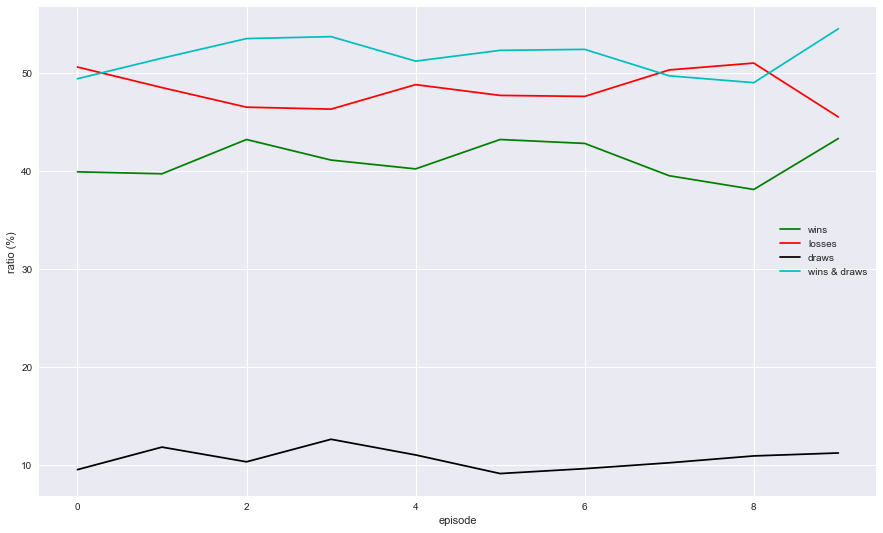


FINAL WIN DRAW RATIO: 49.0% - 54.5%


In [18]:
test_algorithm(game, Q, State, show_steps=False) # show_steps=True logs every action the actor makes